# Imports

In [1]:
# install conda (this restarts the colab kernel -- wait until restart before running subsequent blocks)

!pip install condacolab
import condacolab
condacolab.install_miniconda()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:36
🔁 Restarting kernel...


In [1]:
!pip install geopandas
!pip install hyperopt

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.8 MB/s 
     |████████████████████████████████| 2.3 MB 55.1 MB/s 
     |████████████████████████████████| 7.8 MB 33.1 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 16.9 MB 59.3 MB/s 
     |████████████████████████████████| 12.2 MB 54.2 MB/s 
     |████████████████████████████████| 60 kB 8.8 MB/s 
     |████████████████████████████████| 96 kB 6.7 MB/s 
     |████████████████████████████████| 17.3 MB 1.1 MB/s 
     |████████████████████████████████| 499 kB 67.6 MB/s 
     |████████████████████████████████| 247 kB 67.1 MB/s 


/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.9 MB/s 
     |████████████████████████████████| 200 kB 52.7 MB/s 
     |████████████████████████████████| 34.5 MB 81 kB/s 
     |████████████████████████████████| 840 kB 50.1 MB/s 
     |████████████████████████████████| 2.0 MB 55.0 MB/s 
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492037 sha256=6628c02845933effaaf60dd7078b473ce39005c281aa9029dae4211392cff119
  Stored in directory: /root/.cache/pip/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built future


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import xgboost

from google.colab import drive
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier

# Data Setup

In [3]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [8]:
df = pd.read_pickle("/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/xBD_data/EFs/df_points_posthurr_flood_risk_storm_surge_soil_properties.pkl")

In [9]:
df["y"] = df["damage_class"]
df["y"] = df["y"].astype(int)

In [6]:
# run this if you want to do binary classification
df.loc[df["y"] > 0, "y"] = 1

In [10]:
def replace_with_mean(df: pd.core.frame.DataFrame, column: str):
    df.loc[df[column] == 0, column] = df[column][df[column] > 0].mean()

replace_with_mean(df, "soil_density")
replace_with_mean(df, "sand_content")
replace_with_mean(df, "clay_content")
replace_with_mean(df, "silt_content")

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df[["storm_surge", "flood_risk", "soil_density", "sand_content", "clay_content", 
                                                        "silt_content"]],
                                                    df["y"], test_size=0.25, random_state=1)

# Add weather data

In [ ]:
df_weather = pd.read_pickle("/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/xBD_data/weather_data/xbd_obs_stations.pkl")

In [ ]:
df_weather

,xbd_obs_point,damage_class,disaster_name,capture_date,event_start,event_end,xbd_obs_lon,xbd_obs_lat,usaf,wban,...,state,icao,station_lat,station_lon,elev(m),begin,end,csv_filename,station_point,event_year
xbd_index,,,,,,,,,,,,,,,,,,,,,
0,POINT (-77.92443 34.78850),2,FLORENCE,2018-09-20 16:04:41+00:00,2018-08-30 06:00:00,2018-09-18 12:00:00,-77.924432,34.788502,746929,3702,...,NC,KDPL,35.000,-77.982,41.8,2006-01-01,2023-01-20,7469293702,POINT (-77.982 35),2018
1,POINT (-77.92459 34.78817),1,FLORENCE,2018-09-20 16:04:41+00:00,2018-08-30 06:00:00,2018-09-18 12:00:00,-77.924586,34.788174,746929,3702,...,NC,KDPL,35.000,-77.982,41.8,2006-01-01,2023-01-20,7469293702,POINT (-77.982 35),2018
2,POINT (-85.61007 30.20004),0,MICHAEL,2018-10-13 16:48:15+00:00,2018-10-06 18:00:00,2018-10-15 18:00:00,-85.610074,30.200042,998199,99999,...,FL,NaN,30.150,-85.667,5.0,2008-07-21,2023-01-19,99819999999,POINT (-85.667 30.15),2018
3,POINT (-85.61057 30.20001),0,MICHAEL,2018-10-13 16:48:15+00:00,2018-10-06 18:00:00,2018-10-15 18:00:00,-85.610569,30.200012,998199,99999,...,FL,NaN,30.150,-85.667,5.0,2008-07-21,2023-01-19,99819999999,POINT (-85.667 30.15),2018
4,POINT (-85.61055 30.20060),1,MICHAEL,2018-10-13 16:48:15+00:00,2018-10-06 18:00:00,2018-10-15 18:00:00,-85.610547,30.200601,998199,99999,...,FL,NaN,30.150,-85.667,5.0,2008-07-21,2023-01-19,99819999999,POINT (-85.667 30.15),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23049,POINT (-77.91797 34.64623),0,FLORENCE,2018-09-20 16:04:41+00:00,2018-08-30 06:00:00,2018-09-18 12:00:00,-77.917967,34.646233,723069,93753,...,NC,KOAJ,34.833,-77.617,29.3,2006-01-01,2023-01-20,72306993753,POINT (-77.617 34.833),2018
23050,POINT (-77.91773 34.64628),0,FLORENCE,2018-09-20 16:04:41+00:00,2018-08-30 06:00:00,2018-09-18 12:00:00,-77.917726,34.646278,723069,93753,...,NC,KOAJ,34.833,-77.617,29.3,2006-01-01,2023-01-20,72306993753,POINT (-77.617 34.833),2018
23051,POINT (-77.91765 34.64650),0,FLORENCE,2018-09-20 16:04:41+00:00,2018-08-30 06:00:00,2018-09-18 12:00:00,-77.917652,34.646497,723069,93753,...,NC,KOAJ,34.833,-77.617,29.3,2006-01-01,2023-01-20,72306993753,POINT (-77.617 34.833),2018


# Logistic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
model.score(x_test, y_test)

0.6596113809854268

In [ ]:
importance = model.coef_[0]
display(importance)

array([-0.14143663,  0.06372023,  0.02164937, -0.00263   ,  0.0083934 ,
       -0.01268432])

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

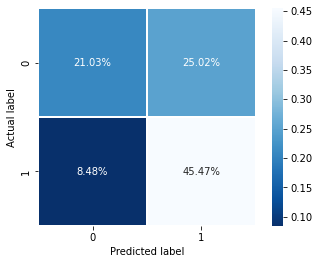

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Random forest hyperparameter tuning

In [32]:
# this section is Work In Progress. 

from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = model.score(x_train, y_train)

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [33]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

  0%|          | 0/80 [00:00<?, ?trial/s, best loss=?]

job exception: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.



  0%|          | 0/80 [00:00<?, ?trial/s, best loss=?]


NotFittedError: ignored

In [25]:
best["criterion"] = "entropy"

In [26]:
model = RandomForestClassifier(**best)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=740.0, max_features=3,
                       min_samples_leaf=0.014493683055833506,
                       min_samples_split=0.08487030997681612, n_estimators=5)

In [27]:
predictions = model.predict(x_test)
model.score(x_test, y_test)

0.5575988896599584

In [ ]:
importance = best.feature_importances_
display(importance)

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

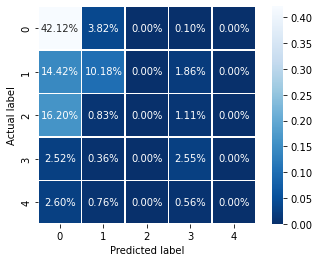

In [24]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Random Forest Model

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
model.score(x_test, y_test)

0.6150242886884109

In [ ]:
importance = model.feature_importances_
display(importance)

array([0.17137759, 0.06564709, 0.12902616, 0.21115417, 0.22362919,
       0.1991658 ])

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

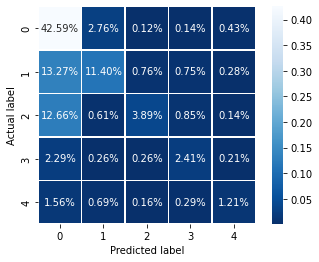

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# XGBoost Model

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(x_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
predictions = model.predict(x_test)

In [ ]:
model.score(x_test, y_test)

0.6006245662734212

In [ ]:
importance = model.feature_importances_
display(importance)

array([0.1803513 , 0.14366801, 0.09929666, 0.24063222, 0.16884027,
       0.16721149], dtype=float32)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

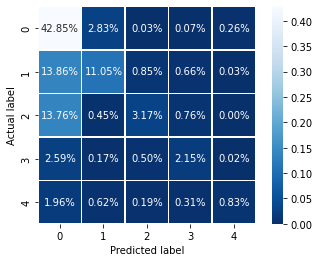

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()